#### Character-Level Tokenizer from Scratch

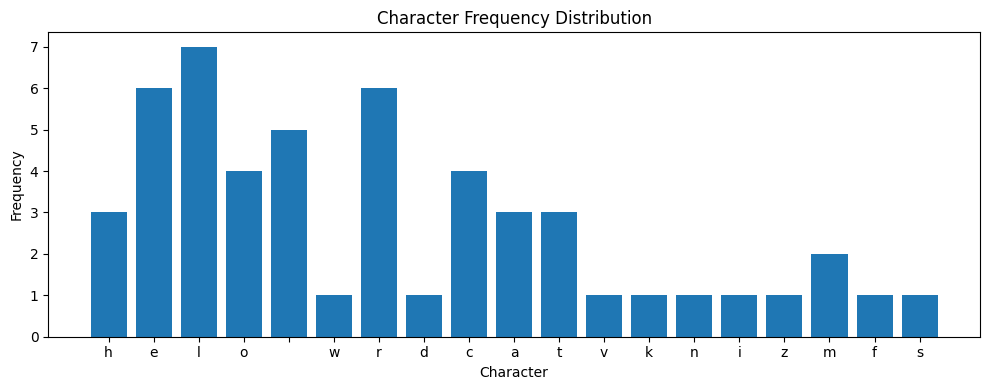

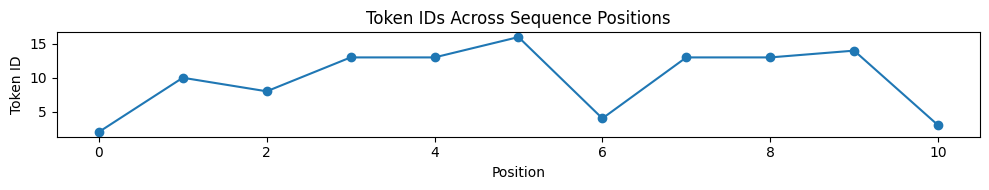

Vocabulary Size: 23
Text: hello llm
Encoded: [2, 10, 8, 13, 13, 16, 4, 13, 13, 14, 3]
Decoded: hello llm


In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# 1. Corpus
corpus = [
    "hello world",
    "character level tokenizer",
    "llm from scratch"
]

# 2. Build Tokenizer
def build_char_tokenizer(texts):
    text = "".join(texts)
    freq = Counter(text)

    vocab = {
        "<PAD>": 0,
        "<UNK>": 1,
        "<BOS>": 2,
        "<EOS>": 3
    }

    for ch in sorted(freq):
        vocab[ch] = len(vocab)

    inv_vocab = {v: k for k, v in vocab.items()}
    return vocab, inv_vocab, freq

vocab, inv_vocab, char_freq = build_char_tokenizer(corpus)

# 3. Encode / Decode
def encode(text):
    return [vocab["<BOS>"]] + [vocab.get(c, vocab["<UNK>"]) for c in text] + [vocab["<EOS>"]]

def decode(tokens):
    return "".join(inv_vocab[t] for t in tokens if inv_vocab[t] not in ["<BOS>", "<EOS>"])

sample = "hello llm"
encoded = encode(sample)
decoded = decode(encoded)

# Visualization
# 1. Character Frequency
plt.figure(figsize=(10, 4))
plt.bar(char_freq.keys(), char_freq.values())
plt.title("Character Frequency Distribution")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Encoding Flow
plt.figure(figsize=(10, 2))
plt.plot(encoded, marker="o")
plt.title("Token IDs Across Sequence Positions")
plt.xlabel("Position")
plt.ylabel("Token ID")
plt.tight_layout()
plt.show()

# Output
print("Vocabulary Size:", len(vocab))
print("Text:", sample)
print("Encoded:", encoded)
print("Decoded:", decoded)